# Problem Set 8

Dennis Cruz dec2174

Collaborators: Edward Sanchez, es2903

In [12]:
# Importing data:

import numpy as np
import matplotlib.pyplot as plt

def read_data(name):
    X = np.genfromtxt(name+'_features.txt', delimiter=',')
    Y = np.genfromtxt(name+'_labels.txt')
    return X, Y

name = "RRLyrae"
X, Y = read_data(name)

### Problem 1

Use a decision tree classifier to classify this data using the colors as a predictor for the label.

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [71]:
# creating the classifier:
def dt_clf (X, Y): # dtc_clf = decision tree classifier
    clf = tree.DecisionTreeClassifier(random_state = 0, class_weight = 'balanced', max_depth = 5)
    dtc_classifier = clf.fit(X,Y)
    return dtc_classifier

dt_classifier = dt_clf(X, Y)

In [76]:
# checking accuracy of predictor:

def accuracy (X, Y, classifier):
    validation = cross_val_score (classifier, X, Y, cv = 5) # checking the cross value score
    return validation

dt_accuracy = accuracy (X, Y, dt_classifier)
print (dt_accuracy)

[0.98169521 0.97927851 0.9774533  0.97750698 0.96881039]


[Text(0.5362903225806451, 0.9166666666666666, 'x[0] <= 0.231\ngini = 0.5\nsamples = 93141\nvalue = [46570.5, 46570.5]'),
 Text(0.31451612903225806, 0.75, 'x[1] <= 0.962\ngini = 0.092\nsamples = 5110\nvalue = [2328.073, 46088.404]'),
 Text(0.20967741935483872, 0.5833333333333334, 'x[0] <= 0.149\ngini = 0.409\nsamples = 1916\nvalue = [960.983, 385.677]'),
 Text(0.12903225806451613, 0.4166666666666667, 'x[3] <= 0.066\ngini = 0.405\nsamples = 305\nvalue = [151.285, 385.677]'),
 Text(0.06451612903225806, 0.25, 'x[3] <= -0.164\ngini = 0.0\nsamples = 178\nvalue = [89.464, 0.0]'),
 Text(0.03225806451612903, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0.503, 0.0]'),
 Text(0.0967741935483871, 0.08333333333333333, 'gini = 0.0\nsamples = 177\nvalue = [88.961, 0.0]'),
 Text(0.1935483870967742, 0.25, 'x[1] <= 0.89\ngini = 0.238\nsamples = 127\nvalue = [61.821, 385.677]'),
 Text(0.16129032258064516, 0.08333333333333333, 'gini = -0.0\nsamples = 66\nvalue = [33.172, 0.0]'),
 Text(0.22580645

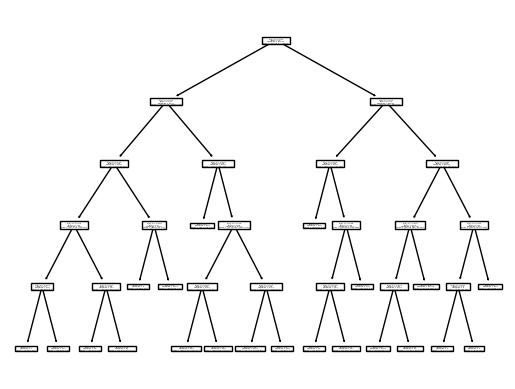

In [73]:
# plotting tree:

tree.plot_tree(dt_classifier)

In [115]:
# Getting predictions:

def predictor (x, classifier):
    predict_star =  classifier.predict(x)
    return predict_star

In [116]:
predict_dt = predictor(X, dt_classifier) # This gives which stars are RR and which are not based on 0 and 1s
print (predict_dt)

[0. 0. 0. ... 1. 1. 1.]


In [101]:
# plotting data to check

def plots (x, y, prediction):
    plt.plot(x, 'green')
    plt.plot(y, 'red')
    plt.plot(prediction, 'orange')
    plt.show()
    return

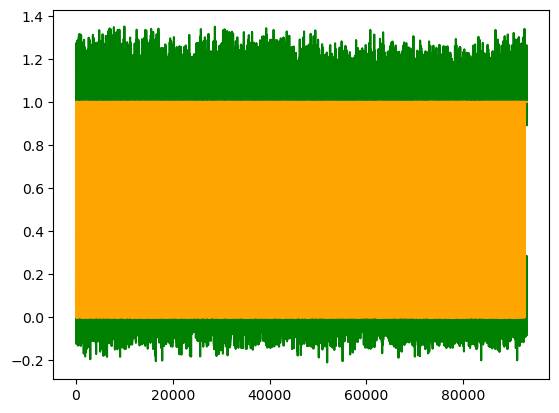

In [60]:
plots (X, Y, predict_star)

Prediction is in between both data, ranging from 0 to 1

### Problem 2

Repeating problem with a SVM classifier

In [63]:
from sklearn import svm


#function to SVM classifier:

def svm_clf (x, y):
    clf = svm.SVC(class_weight = 'balanced')
    svm_classifier = clf.fit(X, Y)
    return svm_classifier

In [81]:
# checking results:

svm_classifier = svm_clf(X, Y)
svm_accurary = accuracy(X, Y, svm_classifier)


In [82]:
print (svm_accurary)

[0.99479306 0.99484647 0.99484647 0.99479279 0.99479279]


In [117]:
# Predicting:

predict_svm = predictor (X, svm_classifier)
print (predict_svm)

[0. 0. 0. ... 0. 0. 0.]


In [109]:
# plotting accuracy plots to compare results:

def acc_plots (acc, color):
    plt.plot(acc, color)
    plt.show()
    return

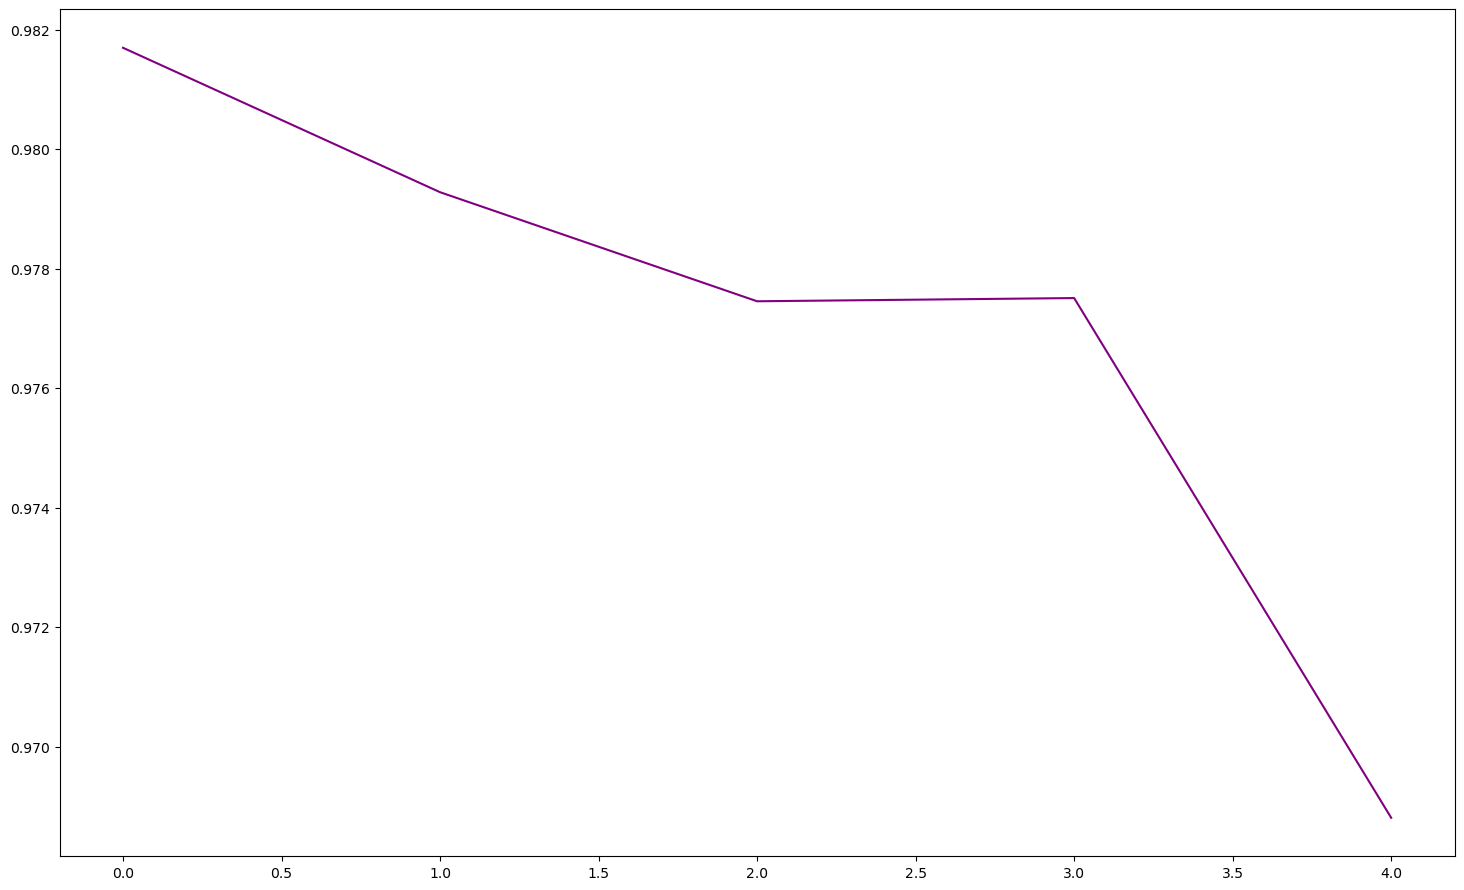

In [110]:
#Checking accuracy of Decision Tree
acc_plots(dt_accuracy, 'purple')

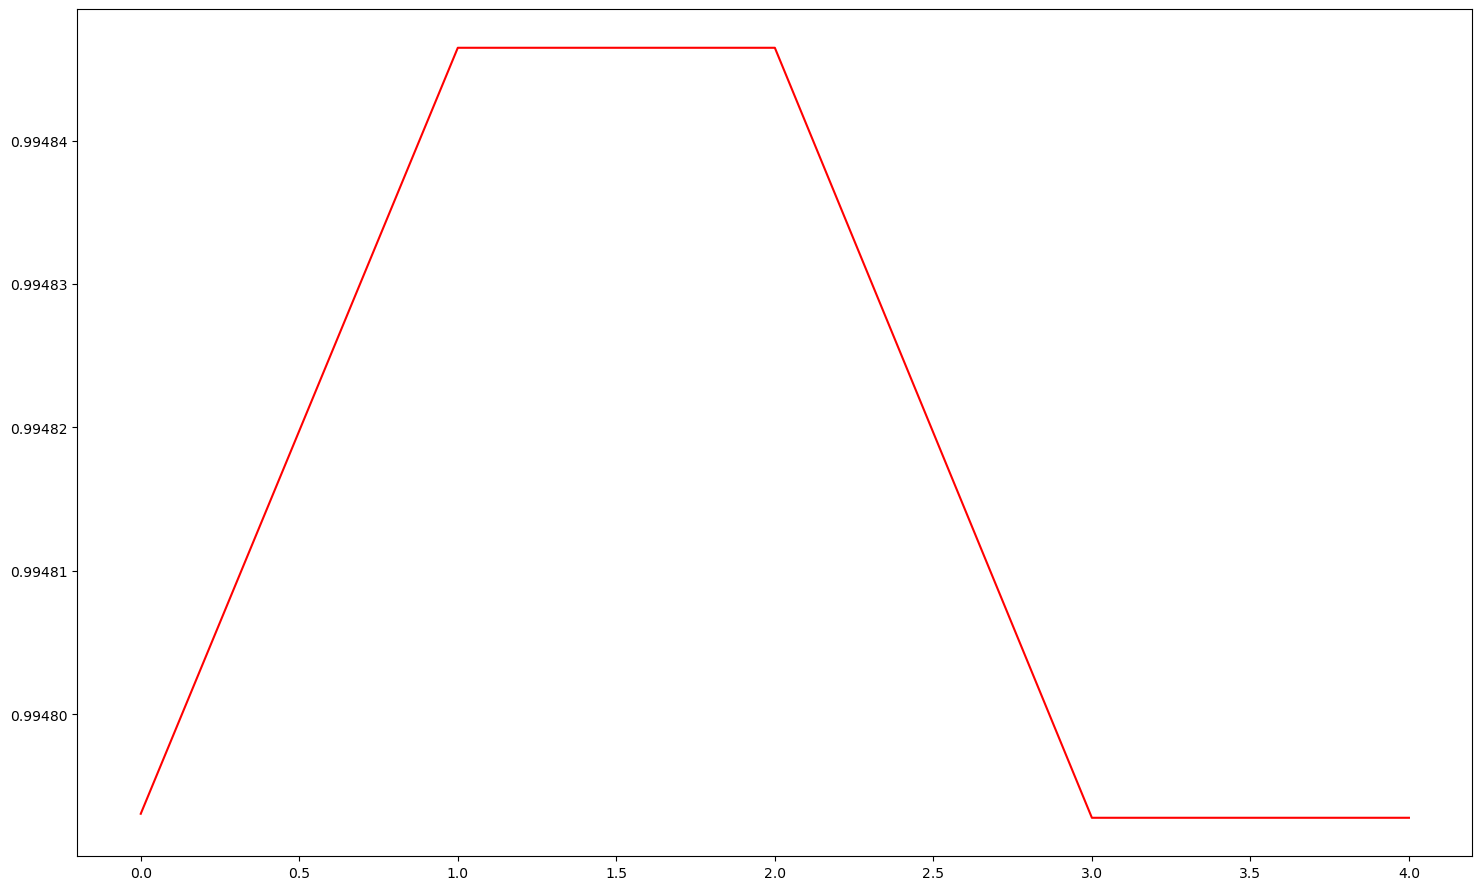

In [111]:
# checking accuracy of SVM
acc_plots(svm_accurary, 'r')

Based on the plots we can see that the accuracy of the results using a Decision Tree classifier reduce as the range of values increase. In comparison, the Support Vector classifier seems to have a higher accuracy of 0.99, closer to the true value 1, which might means this classifier is better for this kind of data.

In [129]:
# Extra, just checking predictions:

prediction_table = []
for i in predict_svm:
    if i == 1:
        i = True
        prediction_table.append(i)
    else:
        i = False
        prediction_table.append(i)

'True' in prediction_table

False

Does this mean there are not good predictions for the SVM classifier? therefore the accuracy doesnt matter because it is not returning an actualvalue for each star? Therefore the Tree is more accurate for this case?

In [130]:
# Other resources used:

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/tree.html#tree
# https://scikit-learn.org/stable/getting_started.html
